In [17]:
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xpart as xp
import xobjects as xo
import json
from pathlib import Path
from matplotlib.lines import Line2D

In [ ]:
directory = Path("/eos/user/l/lpauwels/sps_simulations/MomentumAcceptance/tidp_scan/studies_results/DPpos")
files_pos = [f for f in directory.iterdir() if f.is_file()]

directory = Path("/eos/user/l/lpauwels/sps_simulations/MomentumAcceptance/tidp_scan/studies_results/DPneg")
files_neg = [f for f in directory.iterdir() if f.is_file()]

In [7]:
particles_dictionary = {'DPpos' : {}, 'DPneg' : {}}
for file in files_pos:
    chroma = file.stem
    with open(file, 'r') as fid:
        particles_dictionary['DPpos'][chroma] = json.load(fid)

for file in files_neg:
    chroma = file.stem
    with open(file, 'r') as fid:
        particles_dictionary['DPneg'][chroma] = json.load(fid)

In [16]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')
tw = line.twiss()
sweep = 6000
num_turns = 6000
sweep_per_turn = sweep/num_turns
f = 200_000_000
delta_per_turn = 1/tw.slip_factor * sweep_per_turn/f

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [ ]:
#Colors for plot
chromas = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
norm = plt.Normalize(min(chromas), max(chromas))
cmap = plt.cm.plasma
colors = [cmap(norm(c)) for c in chromas]

In [19]:
particles_dictionary['DPpos'].keys()

dict_keys(['0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

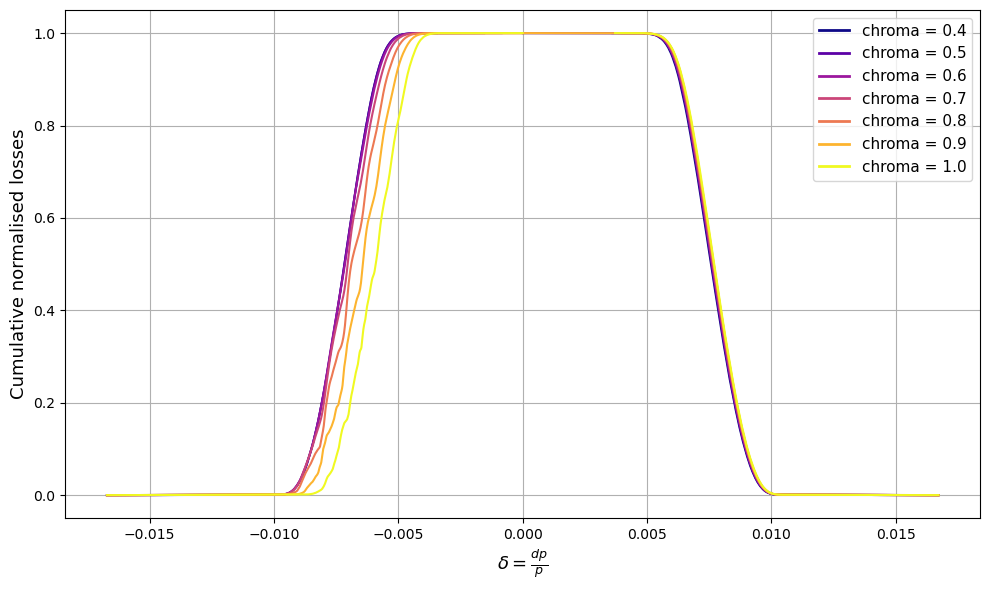

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
max_particles = 1_000_000

#Colors for plot
chromas = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
norm = plt.Normalize(min(chromas), max(chromas))
cmap = plt.cm.plasma
colors = [cmap(norm(c)) for c in chromas]

for i,chroma in enumerate(chromas):
    turns, counts = np.unique(particles_dictionary['DPpos'][str(chroma)]['at_turn'], return_counts=True)
    ax.plot(delta_per_turn*turns, 1 - np.cumsum(counts)/max_particles, color = colors[i])

    turns, counts = np.unique(particles_dictionary['DPneg'][str(chroma)]['at_turn'], return_counts=True)
    ax.plot(-delta_per_turn*turns, 1 - np.cumsum(counts)/max_particles, color = colors[i])


legend_elements = [
    Line2D([0], [0], color=color, lw=2, label=f'chroma = {chroma}') for color, chroma in zip(colors, chromas)
]

ax.legend(handles=legend_elements, fontsize=11)
ax.grid()
ax.set_xlabel(r'$\delta=\frac{dp}{p}$', fontsize=13)
ax.set_ylabel('Cumulative normalised losses', fontsize=13)
fig.tight_layout()
plt.savefig('Radial_steering_chroma.pdf', dpi=300)

In [12]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [13]:
tw = line.twiss()

In [14]:
tw.slip_factor

np.float64(0.0017948377606325737)

In [15]:
1/tw.slip_factor * 3500/200_000_000

np.float64(0.00975018488235521)